# OneAtlas WorldDEM Full Resolution Block - Data Access Example

WorldDEM™ Streaming Service is a Digital Surface Model (DSM) with unprecedented quality, accuracy and coverage. The resolution of the data is 12 meters and it is in GeoTIFF format to represent the surface of the Earth including buildings, infrastructure and vegetation.

In the example, the workflow, the area of interest and the workflow parameters are defined. After running the job, the results are downloaded and visualized. For more information, refer to the block's [UP42 Marketplace page](https://marketplace.up42.com/block/1cdf4786-f524-41d5-9d88-b877c2a2bb4f) and [Documentation](https://docs.up42.com/up42-blocks/data/oneatlas-worlddem-12m.html).

In [1]:
import up42

In [2]:
# authenticate and intialize the project
up42.authenticate(project_id="1234", project_api_key="abcd")
project = up42.initialize_project()

2021-03-11 14:34:46,295 - Authentication with UP42 successful!
2021-03-11 14:34:47,159 - Initialized Project(name: datablock marathon, project_id: 76f9c5f3-8f3a-4add-986b-149da06d2983, description: , createdAt: 2021-03-11T09:25:48.206469Z)


In [3]:
# Construct workflow
workflow = project.create_workflow(name="worlddem12-data-access", use_existing=True)

2021-03-11 14:34:54,355 - Getting existing workflows in project ...
2021-03-11 14:34:54,764 - Got 4 workflows for project 76f9c5f3-8f3a-4add-986b-149da06d2983.
100%|██████████| 4/4 [00:01<00:00,  2.52it/s]
2021-03-11 14:34:56,361 - Using existing workflow: worlddem12-data-access - 74eb64ad-8b83-4b29-b0ea-7968ec7a0deb


In [4]:
# construct parameters
input_tasks = ["oneatlas-worlddem-12m"]
workflow.add_workflow_tasks(input_tasks)

2021-03-11 14:35:02,196 - Added tasks to workflow: [{'name': 'oneatlas-worlddem-12m:1', 'parentName': None, 'blockId': '1cdf4786-f524-41d5-9d88-b877c2a2bb4f'}]


In [5]:
# set aoi
aoi = {"type": "FeatureCollection","features": [{"type": "Feature","properties": {},
      "geometry": {"type": "Polygon","coordinates": [[[13.368789,52.495375],
                                                      [13.383853,52.495375],
                                                      [13.383853,52.502715],
                                                      [13.368789,52.502715],
                                                      [13.368789,52.495375]]]}}]}

In [6]:
# Define the aoi and input parameters of the workflow to run it.
input_parameters = workflow.construct_parameters(geometry=aoi, 
                                                 geometry_operation="bbox")

In [7]:
# Price estimation
workflow.estimate_job(input_parameters)

2021-03-11 14:35:10,909 - Estimated: 416-416 Credits, Duration: 0-0 min.


{'oneatlas-worlddem-12m:1': {'blockConsumption': {'resources': {'unit': 'SQUARE_KM',
    'min': 0.83,
    'max': 0.83},
   'credit': {'min': 415, 'max': 415}},
  'machineConsumption': {'duration': {'min': 0, 'max': 0},
   'credit': {'min': 1, 'max': 1}}}}

In [8]:
# Run a test job to query data availability and check the configuration.
test_job = workflow.test_job(input_parameters, track_status=True)

2021-03-11 14:35:10,919 - +++++++++++++++++++++++++++++++++
2021-03-11 14:35:10,920 - Running this job as Test Query...
2021-03-11 14:35:10,921 - +++++++++++++++++++++++++++++++++
2021-03-11 14:35:10,922 - Selected input_parameters: {'oneatlas-worlddem-12m:1': {'bbox': [13.368789, 52.495375, 13.383853, 52.502715]}, 'config': {'mode': 'DRY_RUN'}}
2021-03-11 14:35:12,345 - Created and running new job: ac372a5f-cdef-40d1-ab97-ebb477789b8e.
2021-03-11 14:35:12,891 - Tracking job status continuously, reporting every 30 seconds...
2021-03-11 14:35:29,641 - Job finished successfully! - ac372a5f-cdef-40d1-ab97-ebb477789b8e


In [9]:
# Run the actual job.
job = workflow.run_job(input_parameters, track_status=True)

2021-03-11 14:35:34,649 - Selected input_parameters: {'oneatlas-worlddem-12m:1': {'bbox': [13.368789, 52.495375, 13.383853, 52.502715]}}
2021-03-11 14:35:38,253 - Created and running new job: 387385a4-0d9a-43a6-8b50-77aaf7946b6e.
2021-03-11 14:35:38,795 - Tracking job status continuously, reporting every 30 seconds...
2021-03-11 14:36:01,031 - Job finished successfully! - 387385a4-0d9a-43a6-8b50-77aaf7946b6e


In [ ]:
job.download_results()

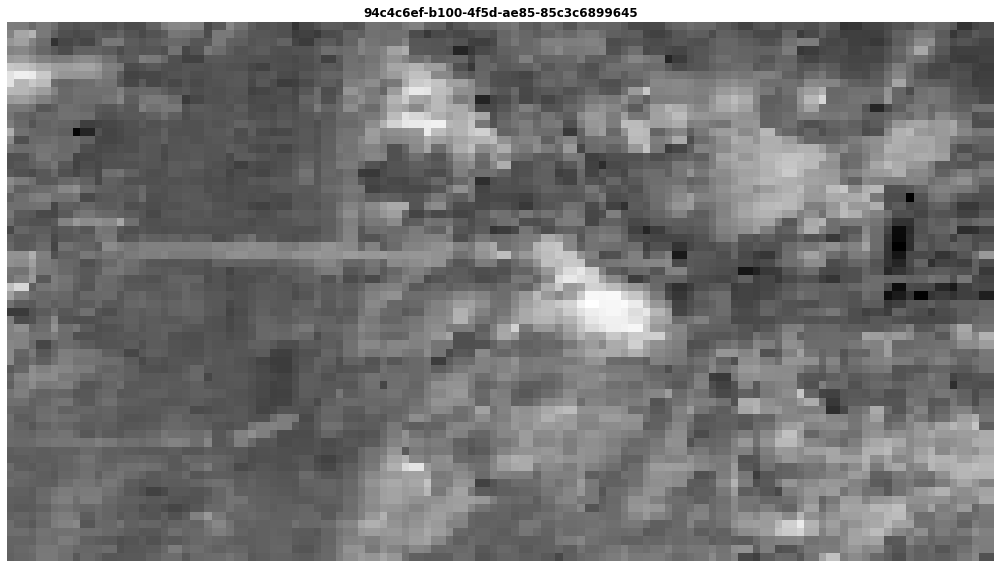

In [13]:
job.plot_results(bands=[1])